In [7]:
!pip install pandas

In [9]:
!pip install matplotlib

In [13]:
!pip install scipy

In [17]:
!pip install numpy

In [19]:
import pandas as pd
import numpy as np

# Generate years from 1880 to 2014
years = np.arange(1880, 2015)

# Simulate CSIRO adjusted sea level data
np.random.seed(42)  # For reproducibility
# General upward trend with random variation
sea_levels = (
    -6.5 + 0.06 * (years - 1880) + np.random.normal(0, 0.5, len(years))
)

# Create a DataFrame
data = {
    "Year": years,
    "CSIRO Adjusted Sea Level": sea_levels.round(2)
}
df = pd.DataFrame(data)

# Save dataset to CSV
df.to_csv("epa-sea-level.csv", index=False)
print("Dataset saved as epa-sea-level.csv")


Dataset saved as epa-sea-level.csv


In [21]:
import pandas as pd

# Load data
df = pd.read_csv("epa-sea-level.csv")
print(df.head())


   Year  CSIRO Adjusted Sea Level
0  1880                     -6.25
1  1881                     -6.51
2  1882                     -6.06
3  1883                     -5.56
4  1884                     -6.38


<Axes: title={'center': 'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

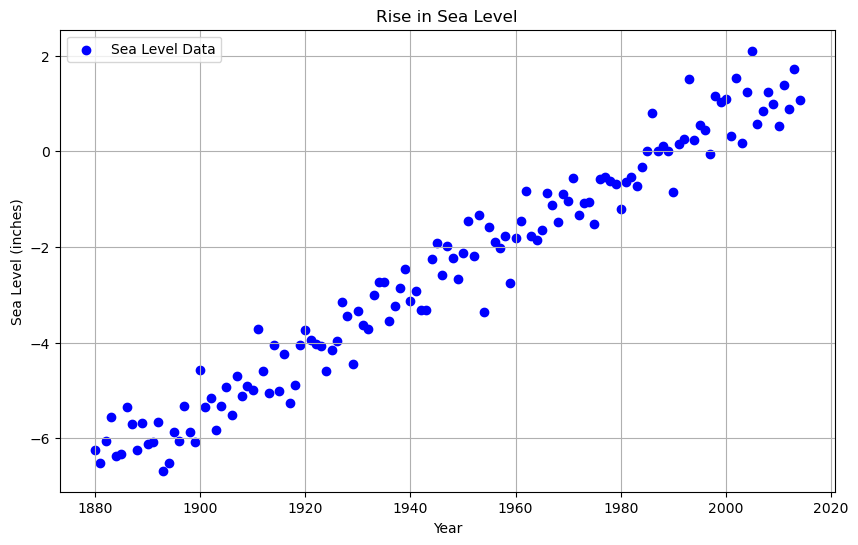

In [23]:
import matplotlib.pyplot as plt

def scatter_plot(data):
    plt.figure(figsize=(10, 6))
    plt.scatter(data["Year"], data["CSIRO Adjusted Sea Level"], color="blue", label="Sea Level Data")
    plt.title("Rise in Sea Level")
    plt.xlabel("Year")
    plt.ylabel("Sea Level (inches)")
    plt.legend()
    plt.grid()
    plt.savefig("scatter_plot.png")
    return plt.gca()

scatter_plot(df)


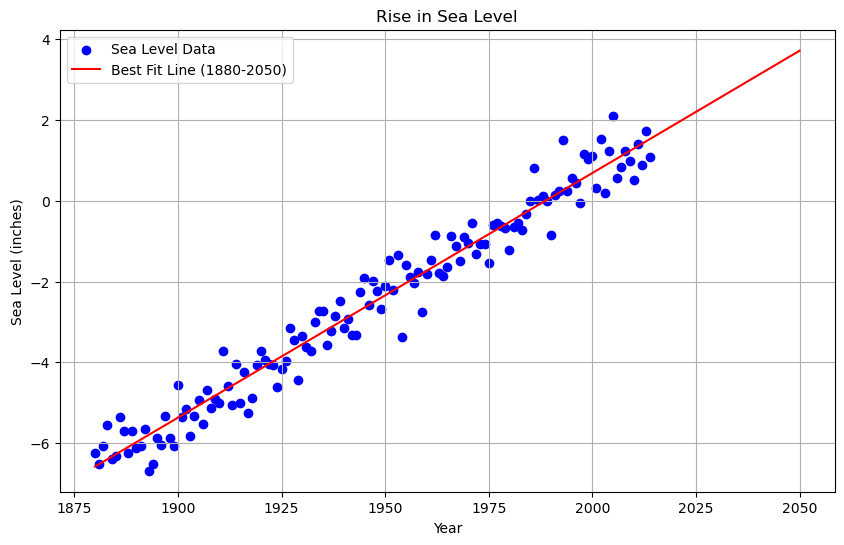

In [25]:
from scipy.stats import linregress

def line_of_best_fit(data, start_year=1880, end_year=2050):
    # Extract years and sea levels
    years = data["Year"]
    sea_levels = data["CSIRO Adjusted Sea Level"]
    
    # Linear regression
    slope, intercept, _, _, _ = linregress(years, sea_levels)
    
    # Create prediction range
    future_years = np.arange(start_year, end_year + 1)
    predicted_levels = slope * future_years + intercept
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(years, sea_levels, color="blue", label="Sea Level Data")
    plt.plot(future_years, predicted_levels, color="red", label="Best Fit Line (1880-2050)")
    plt.title("Rise in Sea Level")
    plt.xlabel("Year")
    plt.ylabel("Sea Level (inches)")
    plt.legend()
    plt.grid()
    plt.savefig("line_of_best_fit_1880_2050.png")
    return slope, intercept

slope_1880, intercept_1880 = line_of_best_fit(df)


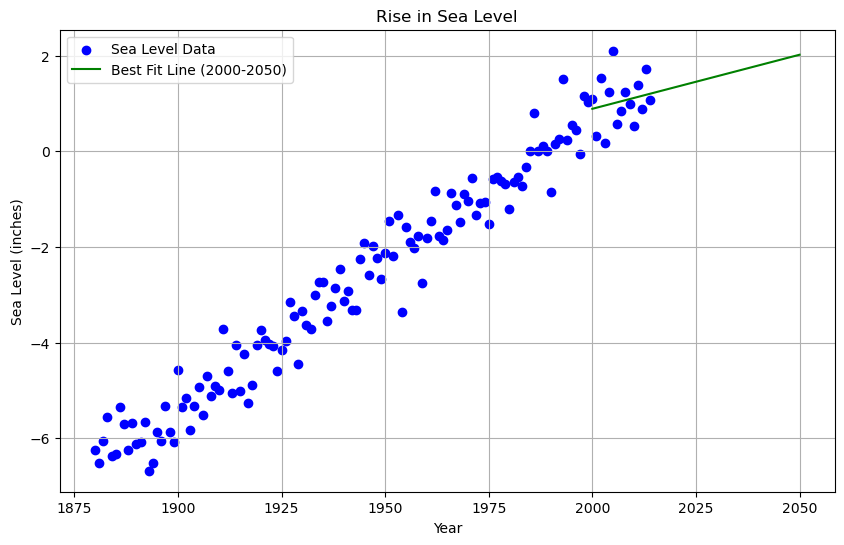

In [27]:
def line_of_best_fit_2000(data, start_year=2000, end_year=2050):
    # Filter data from 2000 onward
    recent_data = data[data["Year"] >= start_year]
    years = recent_data["Year"]
    sea_levels = recent_data["CSIRO Adjusted Sea Level"]
    
    # Linear regression
    slope, intercept, _, _, _ = linregress(years, sea_levels)
    
    # Create prediction range
    future_years = np.arange(start_year, end_year + 1)
    predicted_levels = slope * future_years + intercept
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(data["Year"], data["CSIRO Adjusted Sea Level"], color="blue", label="Sea Level Data")
    plt.plot(future_years, predicted_levels, color="green", label="Best Fit Line (2000-2050)")
    plt.title("Rise in Sea Level")
    plt.xlabel("Year")
    plt.ylabel("Sea Level (inches)")
    plt.legend()
    plt.grid()
    plt.savefig("line_of_best_fit_2000_2050.png")
    return slope, intercept

slope_2000, intercept_2000 = line_of_best_fit_2000(df)
